# Tutorial 1: Visualizing Strain in Continuum Mechanics

<b>Tags:</b> #continuummechanics #strain #fem #biaxialloading <br>
<b>Author:</b> Syed Talha Tirmizi <br>
<b>Last update:</b> 2025-12-21 (Created 2021-12-21) <br>

## Description

In continuum mechanics, we often want to understand how a body deforms under load. Therefore, we look at two fields:
1.  **Displacement ($\mathbf{u}$)**: A vector field that tells us where each point moved.
2.  **Strain ($\boldsymbol{\varepsilon}$)**: A tensor field that tells us how much the body stretched or distorted locally.

While displacement is intuitive, strain is what causes stress and failure. In this tutorial, we will find the **infinitesimal strain tensor** from a displacement field using Python.

### Displacement Field:
$$
\mathbf{u}(\mathbf{x}) = \begin{bmatrix} u_1(x_1, x_2) \\ u_2(x_1, x_2) \end{bmatrix}
$$

where, <br>
&emsp; $u_1$ is the displacement in the x-direction. <br>
&emsp; $u_2$ is the displacement in the y-direction. <br>

### Displacement Gradient ($\nabla \mathbf{u}$)

This gradient is a matrix of partial derivatives that tells us how the displacement changes as we move through the material.

$$
\nabla \mathbf{u} = \begin{bmatrix} 
\frac{\partial u_1}{\partial x_1} & \frac{\partial u_1}{\partial x_2} \\
\frac{\partial u_2}{\partial x_1} & \frac{\partial u_2}{\partial x_2}
\end{bmatrix}
$$

### Small/Infinitesimal Strain Tensor ($\boldsymbol{\varepsilon}$)
The below strain tensor is the symmetric part of the displacement gradient.

$$
\boldsymbol{\varepsilon} = \frac{1}{2} \left[ \nabla \mathbf{u} + (\nabla \mathbf{u})^T \right]
$$

The small strain tensor:
1. It captures deformation such as stretching and shape changes.
2. It removes rotation by adding the transpose (averaging the off-diagonals). Therefore, there is no rigid body rotation which does not cause stress.

## Import Libraries

In [ ]:
import numpy as np              # For numerical operations
import matplotlib.pyplot as plt # For plotting

## Geometry Setup

In [3]:
n_points = 21                    # Number of points along each axis    
x = np.linspace(-1, 1, n_points) # Generate linearly spaced points
y = np.linspace(-1, 1, n_points) # Generate linearly spaced points
X, Y = np.meshgrid(x, y)         # Create a grid of points

In [5]:
print(f"Mesh generated with shape: {X.shape}")

Mesh generated with shape: (21, 21)


## Defining the fields

In [6]:
# Displacements
U = 0.1 * X                                   # Displacement in x-direction
V = -0.1 * Y                                  # Displacement in y-direction
Displacement_magnitude = np.sqrt(U**2 + V**2) # Magnitude of displacement

# Strains
# Generally, np.gradient can be used to compute derivatives (e.g. e11 = du1/dx1 = 0.1 and e22 = du2/dx2 = -0.1)
# but here we define constant strain fields directly for simplicity

E11 = np.full_like(X, 0.1)               # Normal strain in x-direction
E22 = np.full_like(Y, -0.1)              # Normal strain in y

## Plotting

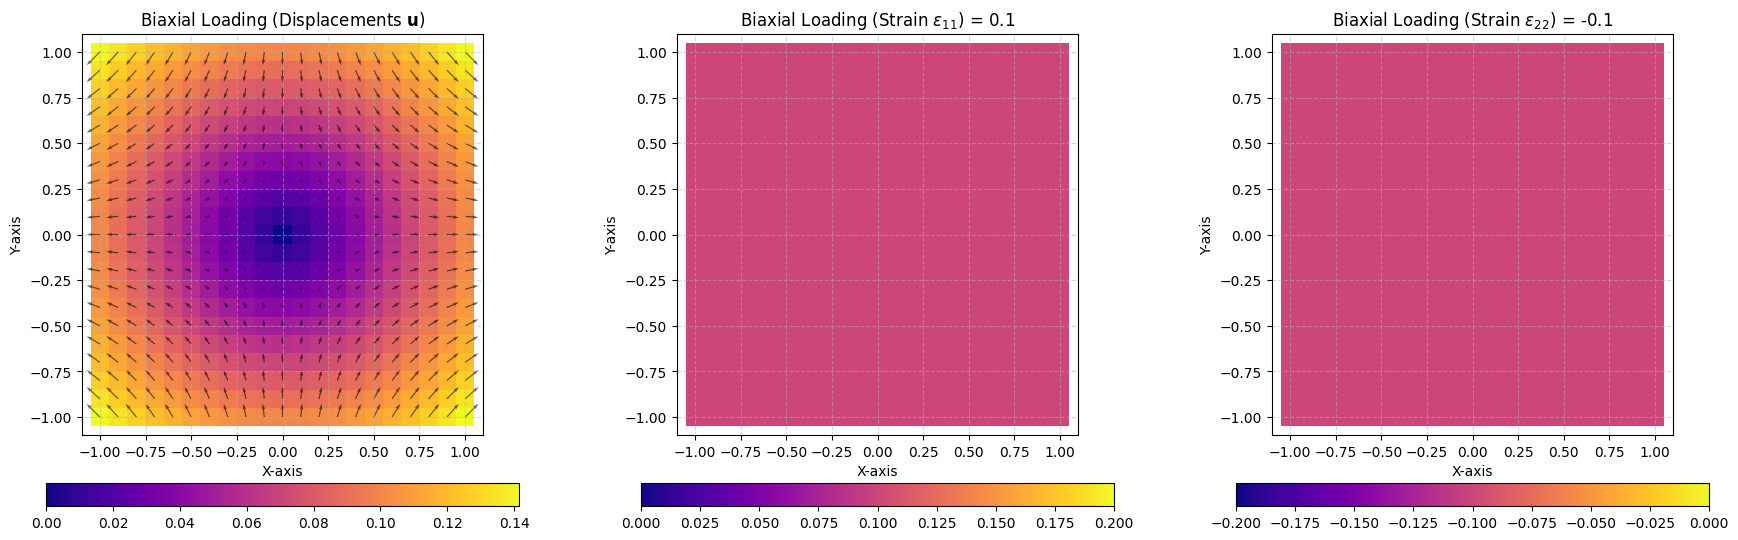

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5.5)) # Create subplots

# Plot Displacement magnitude and vectors
im1 = axes[0].pcolormesh(X, Y, Displacement_magnitude, cmap='plasma', shading='auto')
# Plot displacement vectors
axes[0].quiver(X, Y, U, V, color='black', alpha = 0.6)
axes[0].set_title(r'Biaxial Loading (Displacements $\mathbf{u}$)')
fig.colorbar(im1, ax=axes[0], orientation='horizontal', fraction = 0.05, pad=0.1)

# Plot Strain components 
# Note: E11 is positive, so we set vmin and vmax accordingly
im2 = axes[1].pcolormesh(X, Y, E11, cmap='plasma', vmin = 0, vmax = 0.2, shading='auto')
axes[1].set_title(r'Biaxial Loading (Strain $\varepsilon_{11}$) = 0.1')
fig.colorbar(im2, ax=axes[1], orientation='horizontal', fraction = 0.05, pad=0.1)
# Note: E22 is negative, so we set vmin and vmax accordingly
im3 = axes[2].pcolormesh(X, Y, E22, cmap='plasma', vmin = -0.2, vmax = 0, shading='auto')
axes[2].set_title(r'Biaxial Loading (Strain $\varepsilon_{22}$) = -0.1')
fig.colorbar(im3, ax=axes[2], orientation='horizontal', fraction = 0.05, pad=0.1)

# Common settings for all plots
for ax in axes:
    ax.set_aspect('equal')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

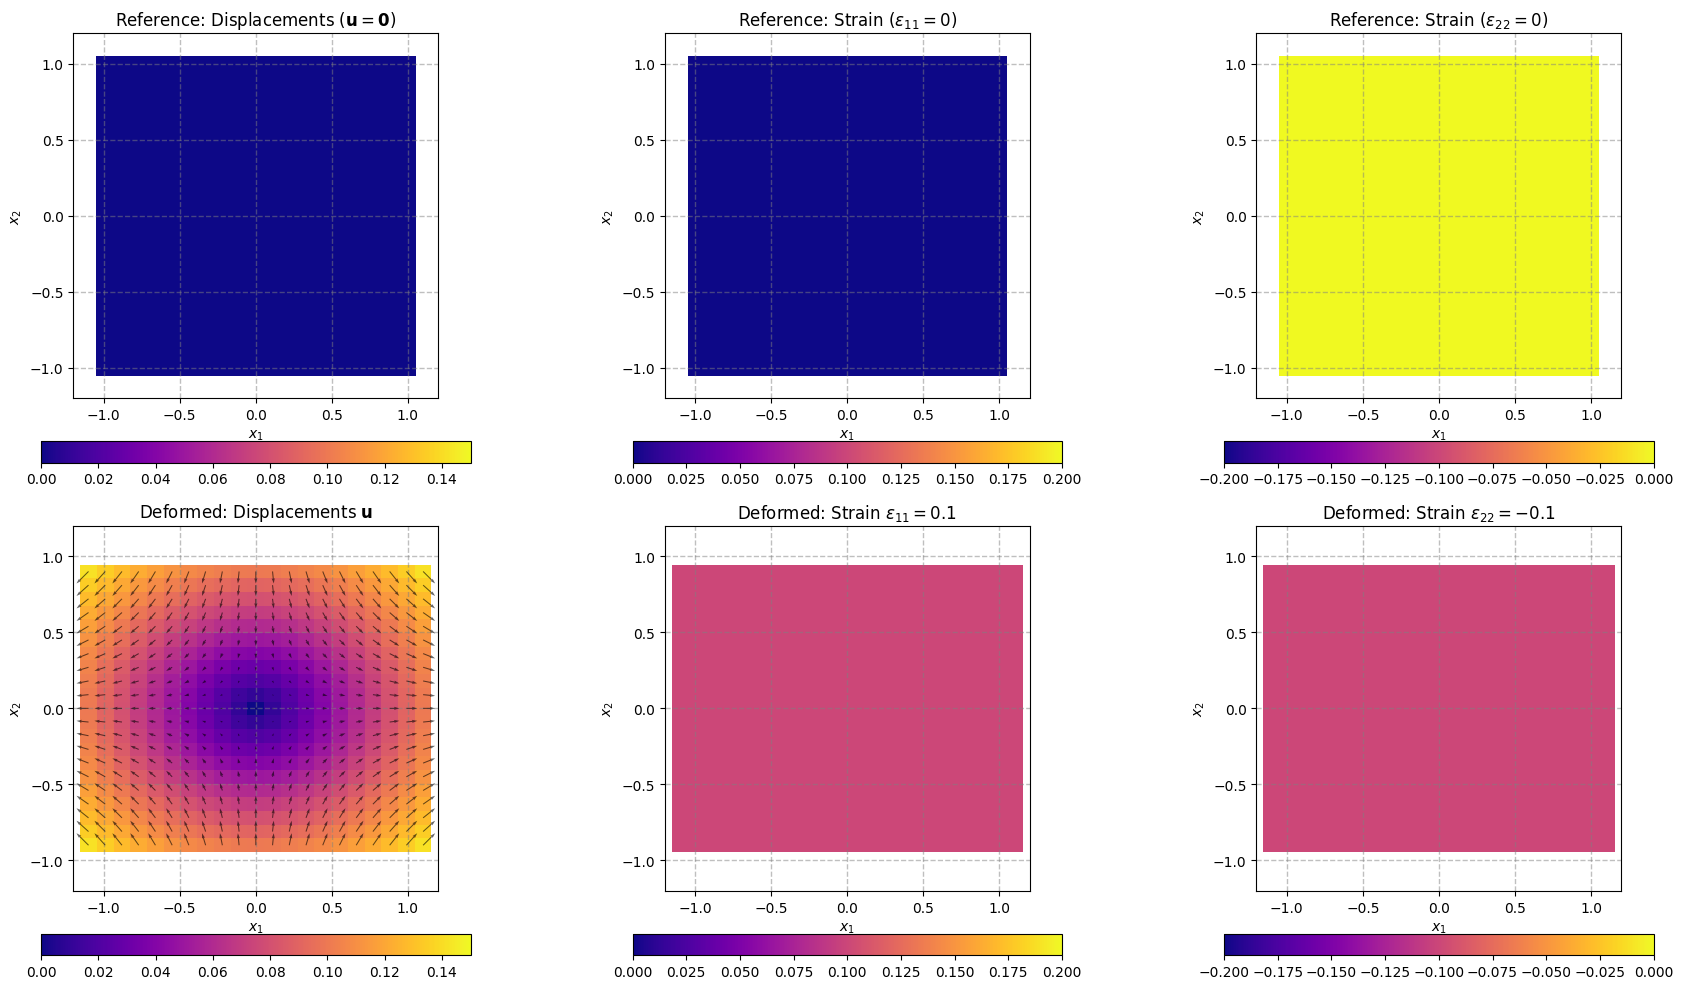

In [20]:
# Define Deformed Coordinates for the Bottom Row
# x_deformed = X + u(X)
X_def = X + U
Y_def = Y + V

# Create a zero field for the Reference configuration (since u=0, e=0 initially)
Zero_Field = np.zeros_like(X)

# Create 2 rows x 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# ==========================================
# ROW 1: REFERENCE CONFIGURATION (Initial)
# ==========================================
# Physics: Displacement = 0, Strain = 0.
# Visuals: Perfect square grid, uniform color, NO ARROWS.

# 1.1 Reference Displacement (Zero)
# We set vmin=0, vmax=0.15 to match the scale of the deformed plot below
im1 = axes[0, 0].pcolormesh(X, Y, Zero_Field, cmap='plasma', vmin=0, vmax=0.15, shading='auto', zorder=1)
axes[0, 0].set_title(r"Reference: Displacements ($\mathbf{u}=\mathbf{0}$)")
fig.colorbar(im1, ax=axes[0, 0], orientation='horizontal', fraction=0.05, pad=0.1)

# 1.2 Reference Strain E11 (Zero)
im2 = axes[0, 1].pcolormesh(X, Y, Zero_Field, cmap='plasma', vmin=0, vmax=0.2, shading='auto', zorder=1)
axes[0, 1].set_title(r"Reference: Strain ($\varepsilon_{11}=0$)")
fig.colorbar(im2, ax=axes[0, 1], orientation='horizontal', fraction=0.05, pad=0.1)

# 1.3 Reference Strain E22 (Zero)
# Note: E22 is negative in deformed state, so 0 is the "max" value (yellowish)
im3 = axes[0, 2].pcolormesh(X, Y, Zero_Field, cmap='plasma', vmin=-0.2, vmax=0, shading='auto', zorder=1)
axes[0, 2].set_title(r"Reference: Strain ($\varepsilon_{22}=0$)")
fig.colorbar(im3, ax=axes[0, 2], orientation='horizontal', fraction=0.05, pad=0.1)


# ==========================================
# ROW 2: DEFORMED CONFIGURATION (Final)
# ==========================================
# Physics: Actual u, E11, E22 values.
# Visuals: Deformed mesh shape, colorful contours, Arrows added for displacement.

# 2.1 Deformed Displacement Magnitude
im4 = axes[1, 0].pcolormesh(X_def, Y_def, Displacement_magnitude, cmap='plasma', vmin=0, vmax=0.15, shading='auto', zorder=1)
# We keep arrows ONLY here, as displacement is active
axes[1, 0].quiver(X_def, Y_def, U, V, color='black', alpha=0.6, zorder=3)
axes[1, 0].set_title(r"Deformed: Displacements $\mathbf{u}$")
fig.colorbar(im4, ax=axes[1, 0], orientation='horizontal', fraction=0.05, pad=0.1)

# 2.2 Deformed Strain E11
im5 = axes[1, 1].pcolormesh(X_def, Y_def, E11, cmap='plasma', vmin=0, vmax=0.2, shading='auto', zorder=1)
axes[1, 1].set_title(r"Deformed: Strain $\varepsilon_{11} = 0.1$")
fig.colorbar(im5, ax=axes[1, 1], orientation='horizontal', fraction=0.05, pad=0.1)

# 2.3 Deformed Strain E22
im6 = axes[1, 2].pcolormesh(X_def, Y_def, E22, cmap='plasma', vmin=-0.2, vmax=0, shading='auto', zorder=1)
axes[1, 2].set_title(r"Deformed: Strain $\varepsilon_{22} = -0.1$")
fig.colorbar(im6, ax=axes[1, 2], orientation='horizontal', fraction=0.05, pad=0.1)


# ==========================================
# COMMON SETTINGS
# ==========================================
for ax in axes.flat:
    ax.set_aspect('equal')
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    
    # Grid: The grid shows the coordinate lines.
    # In Row 2, this grid implicitly follows the data shape (pcolormesh), 
    # but ax.grid() draws the axes grid. 
    # To see the "mesh distortion" purely, we rely on the pcolormesh shape.
    ax.grid(True, color='gray', linestyle='--', linewidth=1, alpha=0.5, zorder=2)
    
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)

plt.tight_layout()
plt.show()

Note: In these plots, the dashed grid represents the material in its original (undeformed) state. The colors and arrows show the magnitude and direction of the deformation field overlaid on that original frame. This is known as the Lagrangian or Material description.

<div style="font-family: Arial, sans-serif; font-size: 10pt; color: #333F48; border-top: 1px solid #ccc; padding-top: 10px; margin-top: 20px;">
    <span style="font-weight: bold; color: #bf5700; text-transform: uppercase;">Syed Talha Tirmizi</span>, PhD Student <br>
    The University of Texas at Austin | Hildebrand Department of Petroleum & Geosystem Engineering | <a href="syedtalha.tirmizi@austin.utexas.edu" style="color: #bf5700; text-decoration: none;">syedtalha.tirmizi@austin.utexas.edu</a>
</div>